In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r_star = 0.5
p_o = 0.8

Time to discover the right item

In [49]:
def solve_time(N):
    result = 1.
    even = N % 2 == 0
    start = N-4 if even else N-2
    for i in range(start, -1, -2):
        result = 1 + result * (N-i-2) / (N-i)
    return result

In [50]:
solve_time(10)

3.0

Regret

In [51]:
def solve_regret_time(N, index):
    vector_regret = np.zeros(N)
    vector_time = np.ones(N)
    for x in range(N-3, -1, -1):
        vector_regret[x] = p_o + p_o * vector_regret[x+2] + (1 - p_o) * vector_regret[x+1]
        vector_time[x] = 1 + p_o * vector_time[x+2] + (1 - p_o) * vector_time[x+1]
    return vector_regret[index], vector_time[index]

In [52]:
def solve_regret_vector(N):
    vector_regret = np.zeros(N)
    vector_time = np.ones(N)
    for x in range(N-3, -1, -1):
        vector_regret[x] = p_o + p_o * vector_regret[x+2] + (1 - p_o) * vector_regret[x+1]
        vector_time[x] = 1 + p_o * vector_time[x+2] + (1 - p_o) * vector_time[x+1]
    return vector_regret, vector_time

In [77]:
def solve2(N):
    vr, vt = solve_regret_vector(N)
#     print(vr, vt)
    even = N % 2 == 0
    start = N-4 if even else N-3
    exp_regret = 0
#     print(exp_regret)
    for i in range(start, -1, -2):
        exp_regret = (1- (N-i-2) / (N-i)) * vr[i+1] + (1 + exp_regret) * (N-i-2) / (N-i)
#         print(i, i+1, vr[i+1], exp_regret)
    exp_time = 1
#     print(exp_time)
    for i in range(start, -1, -2):
        exp_time = 1 + (1- (N-i-2) / (N-i)) * vt[i+1] + exp_time * (N-i-2) / (N-i)
#         print(i, i+1, vt[i+1], exp_time)
    return exp_regret, exp_time
    

In [89]:
def solve(N):
    time_star = solve_time(N)
    num_discovered = int(2 * (time_star - 1) + 1)
    regret_part_two_unscaled, time_part_two = solve_regret_time(N, num_discovered)
    total_time = time_star + time_part_two
    regret = np.zeros(int(total_time) + 1)
    regret[:int(time_star)] = r_star * (time_star - 1) / time_star
    regret[int(time_star):] = regret_part_two_unscaled * r_star / time_part_two
    return regret

In [90]:
def cumulative_regrets(N, horizon):
    regret_ts = solve(N)
    regret_ts = np.concatenate([regret_ts, np.zeros(horizon-len(regret_ts))])
    regret_ts = np.cumsum(regret_ts)
    time_star = solve_time(N)
    regret_ids = np.zeros(horizon)
    regret_ids[:int(time_star)] = r_star * (time_star - 1) / time_star
    regret_ids = np.cumsum(regret_ids)
    return regret_ts, regret_ids

In [91]:
def cumulative_regrets2(N, horizon):
    regret_ts, time_ts = solve2(N)
    regret_ts = np.array([regret_ts * r_star / time_ts] * int(time_ts) + [0] * (horizon - int(time_ts)))
    regret_ts = np.cumsum(regret_ts)
    time_star = solve_time(N)
    regret_ids = np.zeros(horizon)
    regret_ids[:int(time_star)] = r_star * (time_star - 1) / time_star
    regret_ids = np.cumsum(regret_ids)
    return regret_ts, regret_ids

In [92]:
def total_regrets(N):
    regret_ts = solve(N).sum()
    time_star = solve_time(N)
    regret_ids = r_star * (time_star - 1)
    return regret_ts, regret_ids

def total_regrets2(N):
    regret_ts = solve2(N)[0] * r_star
    time_star = solve_time(N)
    regret_ids = r_star * (time_star - 1)
    return regret_ts, regret_ids

In [93]:
given_N, given_horizon = 1000, 5000

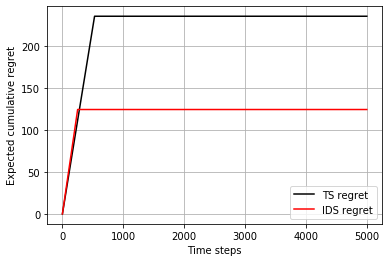

In [94]:
x = np.arange(given_horizon)
rts, rids = cumulative_regrets2(N=given_N, horizon=given_horizon)
plt.plot(x, rts, label='TS regret', color='black')
plt.plot(x, rids, label='IDS regret', color='red')
plt.grid()
plt.ylabel('Expected cumulative regret')
plt.xlabel('Time steps')
plt.legend()

In [95]:
x = np.arange(10, 10000, 100)
regrets = [total_regrets2(elt) for elt in x]

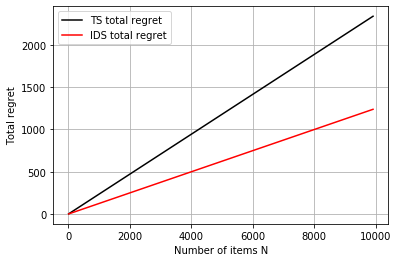

In [97]:
rts, rids = list(zip(*regrets))
plt.plot(x, rts, label='TS total regret', color='black')
plt.plot(x, rids, label='IDS total regret', color='red')
plt.grid()
plt.xlabel('Number of items N')
plt.ylabel('Total regret')
plt.legend()
plt.savefig('mc_results_ids_tscs.png')